## Define Area of Interest (AOI)

Use the map below to draw a rectangle defining your processing area. The maximum size is approximately 600x600 pixels at 10m resolution.

In [8]:
import openeo
from extractor import load_input_WAC


CRS = "EPSG:3035"
RESOLUTION = 10  # important; the resolution is implicitely tied to the CRS; so we need to use UTM based CRS here

SPATIAL_EXTENT = {
    'east': 4811500,
    'south': 2808500,
    'west': 4801500,
    'north': 2818500,
    'crs': CRS
}

TEMPORAL_EXTENT = ["2023-01-01", "2023-02-01"] #TODO for now monthly
MAX_CLOUD_COVER = 85



from extractor import adjust_month_bounds

temp_adj = adjust_month_bounds(TEMPORAL_EXTENT)

print(temp_adj)


['2022-12-31', '2023-03-01']


In [ ]:

connection = openeo.connect("https://openeo.dataspace.copernicus.eu/")
connection.authenticate_oidc()
from extractor import load_sentinel1

s1 = load_sentinel1(conn=connection,
    
            temporal_extent=TEMPORAL_EXTENT,
            spatial_extent=SPATIAL_EXTENT,
            resolution=RESOLUTION,
            crs=CRS
        )
        
job = connection.create_job(s1)

job.start_and_wait()


Authenticated using refresh token.
0:00:00 Job 'j-2505201314074be09c034d25056687ac': send 'start'
0:00:13 Job 'j-2505201314074be09c034d25056687ac': created (progress 0%)
0:00:18 Job 'j-2505201314074be09c034d25056687ac': created (progress 0%)
0:00:25 Job 'j-2505201314074be09c034d25056687ac': created (progress 0%)
0:00:33 Job 'j-2505201314074be09c034d25056687ac': created (progress 0%)
0:00:43 Job 'j-2505201314074be09c034d25056687ac': created (progress 0%)
0:00:55 Job 'j-2505201314074be09c034d25056687ac': created (progress 0%)
0:01:11 Job 'j-2505201314074be09c034d25056687ac': running (progress N/A)
0:01:30 Job 'j-2505201314074be09c034d25056687ac': running (progress N/A)
0:01:54 Job 'j-2505201314074be09c034d25056687ac': running (progress N/A)
0:02:24 Job 'j-2505201314074be09c034d25056687ac': finished (progress 100%)


<BatchJob job_id='j-2505201314074be09c034d25056687ac'>

In [7]:
#TODO request why no cloud masking
input_cube = load_input_WAC(connection, SPATIAL_EXTENT, TEMPORAL_EXTENT, MAX_CLOUD_COVER, RESOLUTION, CRS)
job = connection.create_job(input_cube)

job.start_and_wait()



0:00:00 Job 'j-2505201222414dce92c20f0666dcf4b0': send 'start'
0:00:13 Job 'j-2505201222414dce92c20f0666dcf4b0': created (progress 0%)
0:00:18 Job 'j-2505201222414dce92c20f0666dcf4b0': created (progress 0%)
0:00:24 Job 'j-2505201222414dce92c20f0666dcf4b0': running (progress N/A)
0:00:32 Job 'j-2505201222414dce92c20f0666dcf4b0': running (progress N/A)
0:00:42 Job 'j-2505201222414dce92c20f0666dcf4b0': running (progress N/A)
0:00:55 Job 'j-2505201222414dce92c20f0666dcf4b0': running (progress N/A)
0:01:10 Job 'j-2505201222414dce92c20f0666dcf4b0': running (progress N/A)
0:01:29 Job 'j-2505201222414dce92c20f0666dcf4b0': running (progress N/A)
0:01:54 Job 'j-2505201222414dce92c20f0666dcf4b0': running (progress N/A)
0:02:24 Job 'j-2505201222414dce92c20f0666dcf4b0': running (progress N/A)
0:03:01 Job 'j-2505201222414dce92c20f0666dcf4b0': error (progress N/A)
Your batch job 'j-2505201222414dce92c20f0666dcf4b0' failed. Error logs:
[{'id': '[1747743862622, 436847]', 'time': '2025-05-20T12:24:22.62

JobFailedException: Batch job 'j-2505201222414dce92c20f0666dcf4b0' didn't finish successfully. Status: error (after 0:03:02).

In [ ]:

patch_size = 32  # Reduced from 64 to avoid grid bounds issues
overlap = 16     # Add overlap to handle edge cases

result_cube = input_cube.apply_neighborhood(
    process = udf_inference,
    size=[
        {'dimension': 'x', 'value': patch_size, 'unit': 'px'},
        {'dimension': 'y', 'value': patch_size, 'unit': 'px'}
    ],
    overlap=[
        {'dimension': 'x', 'value': overlap, 'unit': 'px'},
        {'dimension': 'y', 'value': overlap, 'unit': 'px'}
    ]
)


job_options = {'driver-memory': '1000m',
 'driver-memoryOverhead': '1000m',
 'executor-memory': '1500m',
 'executor-memoryOverhead': '1500m',
 'python-memory': '8000m',
 'max-executors': 20,
 "udf-dependency-archives": [
        "https://s3.waw3-1.cloudferro.com/swift/v1/project_dependencies/onnx_dependencies_1.16.3.zip#onnx_deps",
        "https://s3.waw3-1.cloudferro.com/swift/v1/project_dependencies/WAC_model_hansvrp.zip#onnx_models"
        ]
 }

job = connection.create_job(result_cube,
    additional=job_options,
)


job.start_and_wait()



0:00:00 Job 'j-250508113032454194c20aa3ea251f6d': send 'start'
0:00:13 Job 'j-250508113032454194c20aa3ea251f6d': created (progress 0%)
0:00:18 Job 'j-250508113032454194c20aa3ea251f6d': created (progress 0%)
0:00:25 Job 'j-250508113032454194c20aa3ea251f6d': created (progress 0%)
0:00:33 Job 'j-250508113032454194c20aa3ea251f6d': created (progress 0%)
0:00:43 Job 'j-250508113032454194c20aa3ea251f6d': running (progress N/A)
0:00:55 Job 'j-250508113032454194c20aa3ea251f6d': running (progress N/A)
0:01:11 Job 'j-250508113032454194c20aa3ea251f6d': running (progress N/A)
0:01:30 Job 'j-250508113032454194c20aa3ea251f6d': running (progress N/A)
0:01:54 Job 'j-250508113032454194c20aa3ea251f6d': running (progress N/A)
0:02:24 Job 'j-250508113032454194c20aa3ea251f6d': running (progress N/A)
0:03:02 Job 'j-250508113032454194c20aa3ea251f6d': running (progress N/A)
0:03:49 Job 'j-250508113032454194c20aa3ea251f6d': running (progress N/A)
0:04:47 Job 'j-250508113032454194c20aa3ea251f6d': running (progre

<BatchJob job_id='j-250508113032454194c20aa3ea251f6d'>

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4000, 'height': 4000, 'count': 1, 'crs': CRS.from_epsg(3035), 'transform': Affine(10.0, 0.0, 4801500.0,
       0.0, -10.0, 2848500.0), 'blockxsize': 32, 'blockysize': 32, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


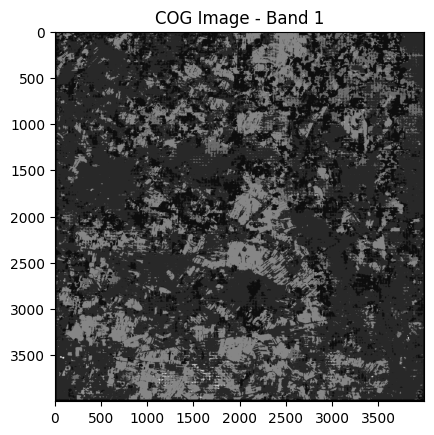

In [46]:

import rasterio
import matplotlib.pyplot as plt

results = job.get_results()
results.download_files("C:/Git_projects/WAC/production/prediction/test_hv_big")

# Open the COG file (can be a local path or a URL if it's cloud-hosted)
with rasterio.open('C:/Git_projects/WAC/production/prediction/test_hv_big/openEO.tif') as src:
    print(src.profile)  # Basic info
    data = src.read(1)  # Read the first band

    plt.imshow(data, cmap='gray')
    plt.title('COG Image - Band 1')
    plt.show()
